# us-accidents-analysis

Use the "Run" button to execute the code.

#US accidents analysis

About EDA


About the dataset(source,content,uses):
1.   kaggle
2.   US accidents
3.   prevent accidents






In [18]:
pip install opendatasets --upgrade --quiet

In [19]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download('https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents')

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


## data preparation and cleaning


1.   load the dataset 
2.   fix missing values 







In [27]:

data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

In [9]:
import pandas as pd


In [10]:

import numpy as np



In [11]:

import matplotlib.pyplot as plt


In [12]:

import seaborn as sns



In [29]:
accidents = pd.read_csv('./us-accidents/US_Accidents_Dec21_updated.csv')


In [30]:
accidents.head()




,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [31]:

accidents.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [32]:

accidents.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [33]:
accidents.isnull().sum()


ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [34]:
accidents.dropna(inplace=True)


In [35]:
accidents.isnull().sum()


ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [36]:
accidents.duplicated().sum()

0

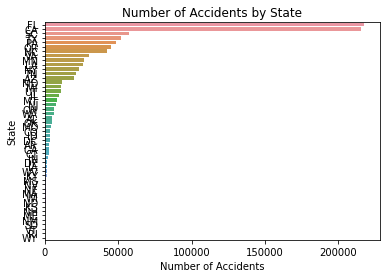

In [37]:
accidents_by_state = accidents.groupby('State')['ID'].count().sort_values(ascending=False)
sns.barplot(x=accidents_by_state.values, y=accidents_by_state.index)
plt.title('Number of Accidents by State')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()

In [39]:
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])

In [40]:
accidents_by_time = accidents.groupby(pd.Grouper(key='Start_Time', freq='H'))['ID'].count()

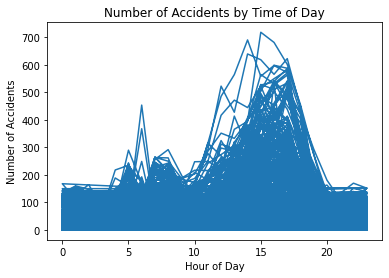

In [41]:
accidents_by_time = accidents.groupby(pd.Grouper(key='Start_Time', freq='H'))['ID'].count()
plt.plot(accidents_by_time.index.hour, accidents_by_time.values)
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


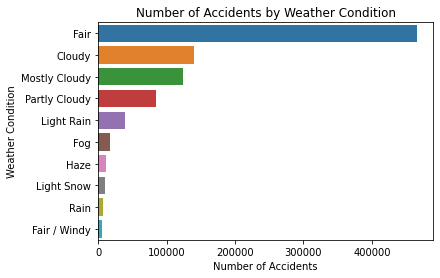

In [42]:
accidents_by_weather = accidents.groupby('Weather_Condition')['ID'].count().sort_values(ascending=False)[:10]
sns.barplot(x=accidents_by_weather.values, y=accidents_by_weather.index)
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()


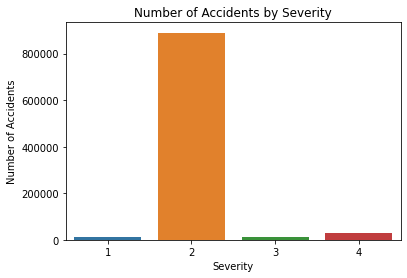

In [43]:
accidents_by_severity = accidents.groupby('Severity')['ID'].count().sort_values(ascending=False)
sns.barplot(x=accidents_by_severity.index, y=accidents_by_severity.values)
plt.title('Number of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


In [45]:
severity_by_weather = pd.crosstab(accidents['Severity'], accidents['Weather_Condition'])


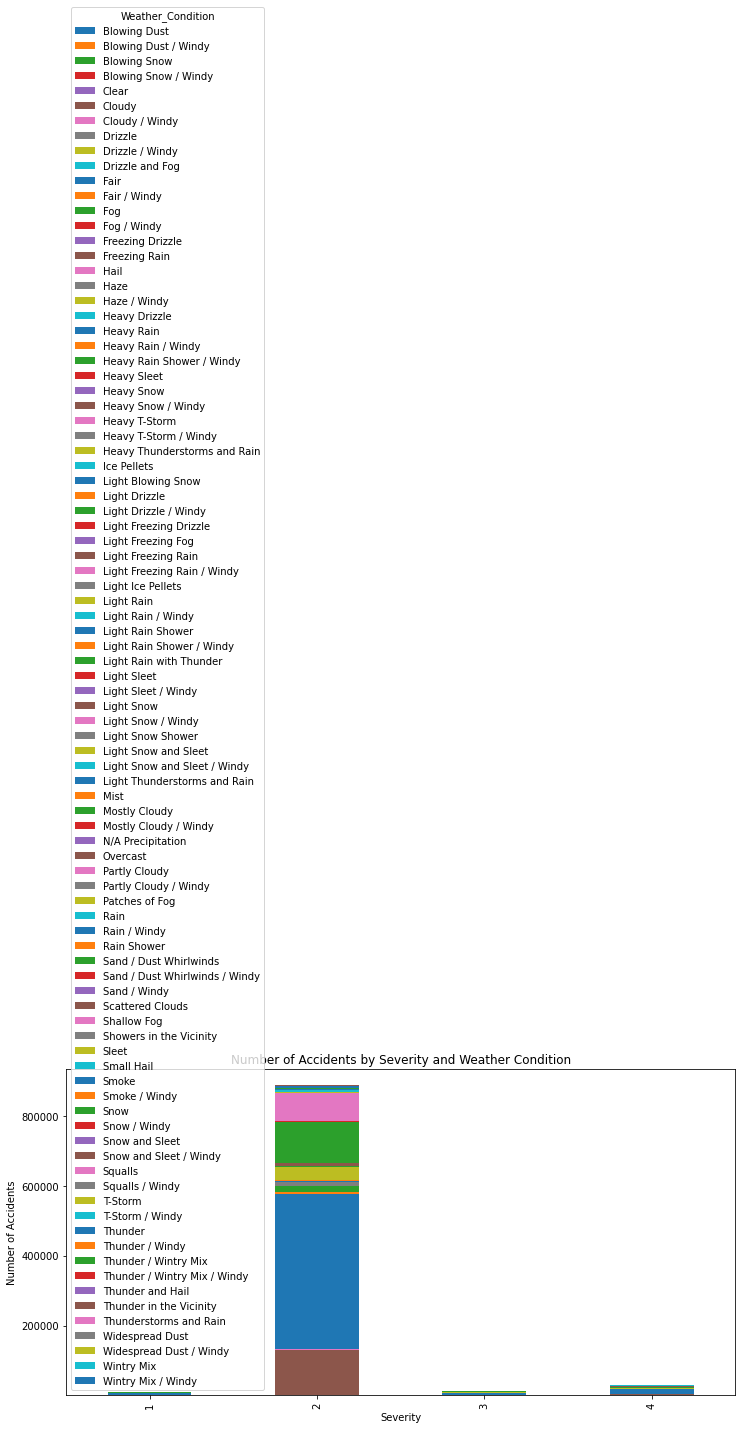

In [46]:
# Create a stacked bar chart of severity by weather condition
severity_by_weather.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Severity and Weather Condition')
plt.show()
